In [13]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('Podaci/regular_season_detailed_results.csv')
df

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60513,2014,132,1196,61,1246,60,N,0,23,53,...,11,21,26,12,24,9,12,4,8,19
60514,2014,132,1277,69,1276,55,N,0,27,54,...,23,15,16,13,15,7,9,3,3,15
60515,2014,132,1386,65,1433,61,N,0,24,50,...,19,8,15,13,25,9,5,6,6,18
60516,2014,132,1418,82,1209,81,N,1,32,75,...,19,20,21,4,26,8,7,5,7,15


In [22]:
i = df['wstl']
j = df['lstl']
x = abs(i-j)
y = 0.015*(x**2) - 0.334*x + 0.5556
y

0       -0.0524
1       -0.5404
2       -0.3114
3       -1.2844
4       -0.3114
          ...  
60513   -0.7394
60514   -0.5404
60515   -0.5404
60516    0.2366
60517   -0.7394
Length: 60518, dtype: float64

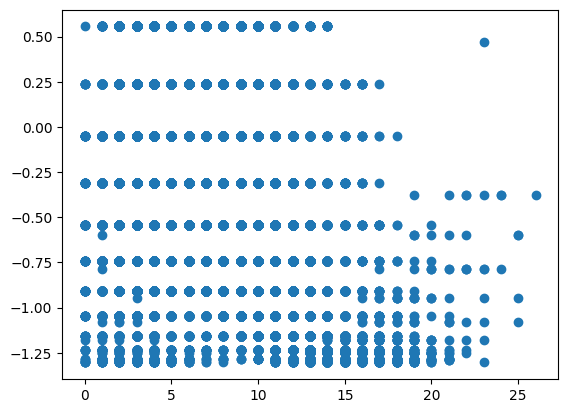

In [23]:
plt.scatter(i, y)

In [5]:
mod = smf.ols(formula='wscore ~ C(wstl) + C(lstl)', data = df)

In [6]:
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wscore   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     37.39
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:18:40   Log-Likelihood:            -2.3040e+05
No. Observations:               60518   AIC:                         4.609e+05
Df Residuals:                   60469   BIC:                         4.613e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        69.4525      1.180     58.874      0.000      67.140      71.765
C(wstl)[T.1]      1.9787      1.057      1.871      0.061      -0.094       4.051
C(wstl)[T.2]      1.8425      1.009      1.826      0.068      -0.135       3.820
C(wstl)[T.3]      1.9083      0.995      1.919      0.055      -0.041       3.858
C(wstl)[T.4]      2.1787      0.990      2.202      0.028       0.239       4.118
C(wstl)[T.5]      2.8500      0.987      2.886      0.004       0.915       4.785
C(wstl)[T.6]      3.1303      0.987      3.173      0.002       1.197       5.064
C(wstl)[T.7]      3.5539      0.987      3.601      0.000       1.619       5.488
C(wstl)[T.8]      3.9383      0.988      3.988      0.000       2.003       5.874
C(wstl)[T.9]      4.3574      0.990      4.403      0.000       2.418       6.297
C(wstl)[T.10]     5.2664      0.993      5.304      0.000       3.320       7.212
C(wstl)[T.11]     5.5012      0.999      5.509      0.000       3.544       7.458
C(wstl)[T.12]     6.2841      1.007      6.241      0.000       4.311       8.258
C(wstl)[T.13]     7.1744      1.021      7.028      0.000       5.174       9.175
C(wstl)[T.14]     7.7841      1.044      7.455      0.000       5.738       9.831
C(wstl)[T.15]     9.4724      1.080      8.768      0.000       7.355      11.590
C(wstl)[T.16]    10.2090      1.146      8.910      0.000       7.963      12.455
C(wstl)[T.17]     9.8907      1.249      7.921      0.000       7.443      12.338
C(wstl)[T.18]    13.0219      1.425      9.140      0.000      10.229      15.814
C(wstl)[T.19]    14.4830      1.622      8.927      0.000      11.303      17.663
C(wstl)[T.20]    18.7218      2.042      9.167      0.000      14.719      22.725
C(wstl)[T.21]    16.3922      2.522      6.499      0.000      11.449      21.336
C(wstl)[T.22]     9.5498      3.583      2.665      0.008       2.527      16.573
C(wstl)[T.23]    22.7134      3.976      5.713      0.000      14.920      30.506
C(wstl)[T.24]    27.7999      6.368      4.365      0.000      15.318      40.282
C(wstl)[T.25]    20.8570      5.537      3.767      0.000      10.004      31.710
C(wstl)[T.26]    23.2485     10.943      2.125      0.034       1.800      44.697
C(lstl)[T.1]      1.4631      0.728      2.010      0.044       0.037       2.890
C(lstl)[T.2]      1.0491      0.689      1.523      0.128      -0.301       2.399
C(lstl)[T.3]      1.1489      0.678      1.694      0.090      -0.180       2.478
C(lstl)[T.4]      0.9639      0.674      1.430      0.153      -0.357       2.285
C(lstl)[T.5]      0.9719      0.672      1.446      0.148      -0.346       2.290
C(lstl)[T.6]      1.2569      0.673      1.869      0.062      -0.062       2.575
C(lstl)[T.7]      1.2990      0.674      1.927      0.054      -0.022       2.620
C(lstl)[T.8]      1.1756      0.677      1.736   

In [15]:
i2 = df['wscore']
j2 = df['lscore']
x2 = abs(i2-j2)
y2 = -2*(math.e**(-6))*(x2**2) + 0.0018*x2 + 0.5028
y2

0        0.335130
1        0.272482
2       -0.189481
3        0.335130
4        0.335130
           ...   
60513    0.499642
60514   -0.443671
60515    0.430680
60516    0.499642
60517    0.117442
Length: 60518, dtype: float64

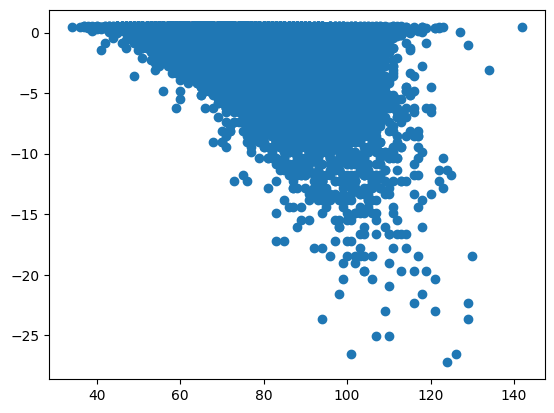

In [24]:
plt.scatter(i2, y2)

In [18]:
i3 = df['wblk']
j3 = df['lblk']
x3 = abs(i3-j3)
y3 = 0.0077*(x3**2) + 0.0252*x3 + 0.5465
y3

0        0.5794
1        0.6277
2        0.6914
3        0.5794
4        0.6914
          ...  
60513    0.8650
60514    0.6914
60515    0.5794
60516    0.9749
60517    0.6277
Length: 60518, dtype: float64

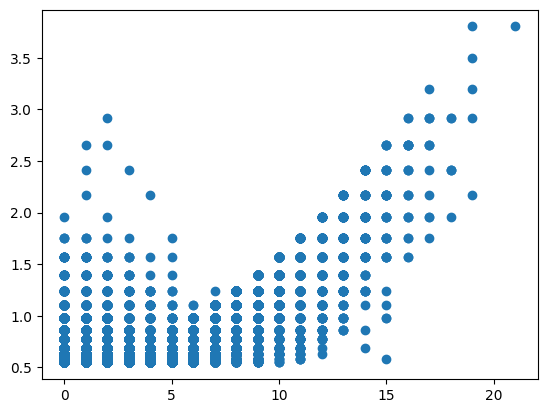

In [25]:
plt.scatter(i3, y3)

In [20]:
i4 = df['wfgm']
j4 = df['lfgm']
x4 = abs(i4-j4)
y4 = -0.0027*(x4**2) + 0.0698*x4 + 0.4904
y4

0        0.7719
1        0.6192
2        0.6192
3        0.4904
4        0.8120
          ...  
60513    0.7719
60514    0.9184
60515    0.4904
60516    0.7264
60517    0.6755
Length: 60518, dtype: float64

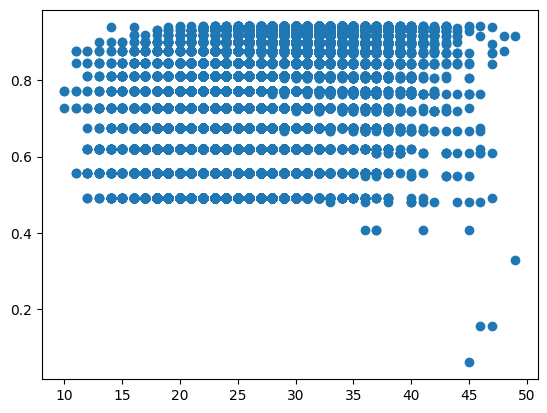

In [26]:
plt.scatter(i4, y4)